In [50]:
# importing all libraries/classes that will be used in my solution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [51]:
training_file = r"C:\Andrii\Kaggle\Titanic\Новая папка\titanic\train.csv"
df = pd.read_csv(training_file,index_col = "PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


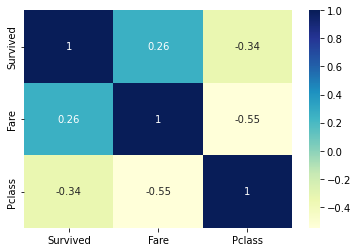

In [52]:
features = ["Survived","Fare", "Pclass"]
dataplot = sns.heatmap(df[features].corr(), cmap="YlGnBu", annot=True)

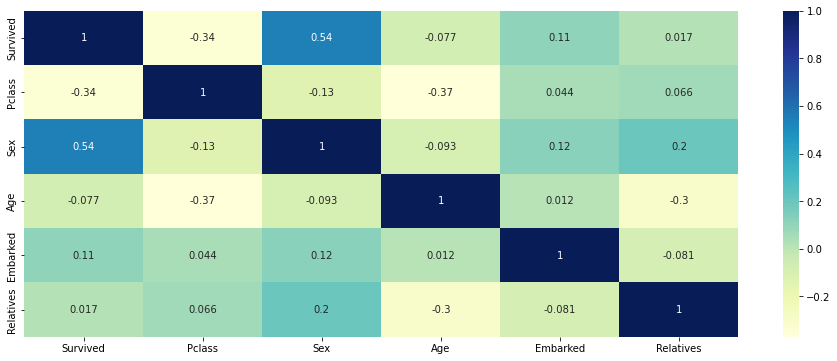

In [53]:
df["Relatives"] = df['SibSp']+df['Parch']
# df["Alone"] = [1 if relatives == 0 else 0 for relatives in df["Relatives"]]
df['Sex'] = df['Sex'].replace(['male'], 0)
df['Sex'] = df['Sex'].replace(['female'], 1)
df['Embarked'] = df['Embarked'].replace(['S'], 0)
df['Embarked'] = df['Embarked'].replace(['C'], 1)
df['Embarked'] = df['Embarked'].replace(['Q'], 2)

df= df.drop(["Fare","SibSp","Parch",'Ticket','Cabin'],axis = 1)

plt.figure(figsize=(16,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

{'Dr.', 'Mr.', 'Col.', 'Capt.', 'Major.', 'Mme.', 'Mlle.', 'Ms.', 'Rev.', 'Countess.', 'Master.', 'Sir.', 'Lady.', 'Jonkheer.', 'Miss.', 'L.', 'Mrs.', 'Don.'}


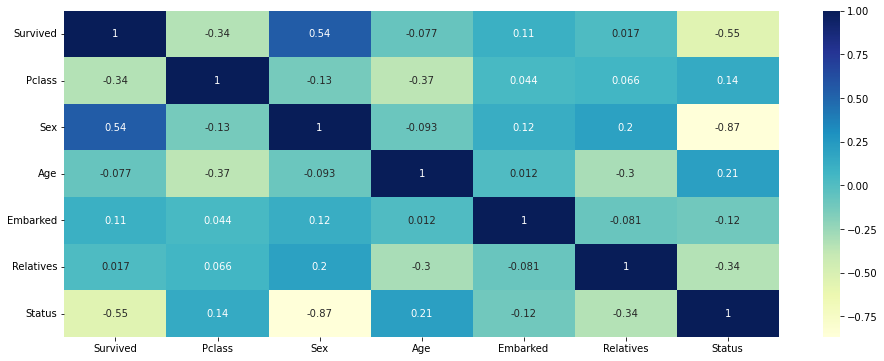

In [54]:
titles_set = set()
for name in df["Name"]:
    name_list = name.split(" ")
    for part in name_list:
        if part.endswith("."):
            titles_set.add(part)
print(titles_set)
df['Status'] = 0
for ind in df.index.values:
    if "Mr." in df.loc[ind,'Name']:
        df.loc[ind,"Status"] = 1
plt.figure(figsize=(16,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [55]:
df = df.drop(['Name'],axis =1)
for col in df:
    if df[col].isnull().values.any() ==True:
        df[col] = df[col].fillna(df[col].median())

In [56]:
features = ["Sex","Pclass","Age","Relatives","Status","Embarked"]
X=df[features]
y= df['Survived']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42)

In [57]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [100, 500, 1000,5000,10000]
}
# create the logistic regression model
model = LogisticRegression()

# create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# print the best hyperparameters and their score
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print("Best Score:", grid_search.best_score_)

C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

Best Hyperparameters: {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8143642688811582


In [58]:
lr = LogisticRegression(**best_params)
lr.fit(train_X, train_y)

LogisticRegression(C=1, max_iter=5000, solver='saga')

In [59]:
test_file = r"C:\Andrii\Kaggle\Titanic\Новая папка\titanic\test.csv"
df_test = pd.read_csv(test_file)
df_test=df_test.set_index("PassengerId")
df_test["Relatives"] = df_test['SibSp']+df_test['Parch']
# df["Alone"] = [1 if relatives == 0 else 0 for relatives in df["Relatives"]]
df_test['Sex'] = df_test['Sex'].replace(['male'], 0)
df_test['Sex'] = df_test['Sex'].replace(['female'], 1)
df_test['Embarked'] = df_test['Embarked'].replace(['S'], 0)
df_test['Embarked'] = df_test['Embarked'].replace(['C'], 1)
df_test['Embarked'] = df_test['Embarked'].replace(['Q'], 2)

df_test= df_test.drop(["Fare","SibSp","Parch",'Ticket','Cabin'],axis = 1)

titles_set = set()
for name in df_test["Name"]:
    name_list = name.split(" ")
    for part in name_list:
        if part.endswith("."):
            titles_set.add(part)

df_test['Status'] = 0
for ind in df_test.index.values:
    if "Mr." in df_test.loc[ind,'Name']:
        df_test.loc[ind,"Status"] = 1
        
df = df_test.drop(['Name'],axis =1)
for col in df_test:
    if df_test[col].isnull().values.any() ==True:
        df_test[col] = df_test[col].fillna(df_test[col].median())
        
features = ["Sex","Pclass","Age","Relatives","Status","Embarked"]
X=df_test[features]
test_preds = lr.predict(X)
output = pd.DataFrame({'PassengerId': df_test.index.values,
                       'Survived': test_preds})
output.to_csv(r"C:\Andrii\Kaggle\Titanic\Новая папка\titanic\3103\submission_lr_78.708_add_Embarked.csv", index=False)